# Numerisk laboration II: Bayesiansk inferens för parameterestimering

## Bayesiansk inferens och maskininlärning [TIF385], Chalmers, lp2 4

Senast uppdaterad:2-Dec-2024 av Christian Forssén [christian.forssen@chalmers.se]

## Instruktioner

- Se deadline för examination på kurshemsidan.
- Denna numeriska laboration examineras genom individuellt godkänt på obligatoriska uppgifter i Yata, samt genom godkänd redovisning av lösningar och resultat vid en gruppdiskussion som leds av övningsledare.
- Laborationen genomförs individuellt men redovisning sker i seminarieform med flera studenter åt gången.
- Diskussioner och samarbete mellan studenter är tillåtet, men varje student som deltar i en redovisning måste på egen hand kunna svara på frågor kring lösning och tolkning av samtliga delar av laborationen.

### Resultat och figurer
- Vid gruppredovisningen skall varje student vara beredd att köra sin lösningskod och kunna demonstrera resultat via efterfrågade figurer.
- Alla figurer skall vara tydliga att avläsa, med rubriker på axlar och en beskrivning av kurvor och/eller data.
- Ni skall kunna tolka era resultat och förklara hur dessa genererades.

## Uppgift

Det övergripande målet är att reproducera några resultat från den vetenskapliga artikeln: [*Bayesian parameter estimation for effective field theories*](https://arxiv.org/abs/1511.03618) av Sarah Wesolowski et al.  

Detta är en lång artikel med en ganska detaljerad guide till användandet av Bayesiansk inferens inom fysikalisk modellering, och speciellt när man använder så kallade effektiva fältteorier. Vi kommer enbart att fokusera på en liten del inom Sec. II och ni behöver alltså inte läsa artikeln.

I artikeln introduceras en enkel domänbegränsad modell, nämligen Taylorutvecklingen av en trigonometrisk funktion, för att simulera egenskaper hos en effektiv fältteori. Situationen motsvarar att man har en övergripande fysikalisk förståelse för sin modell, men saknar detaljerad kunskap (eller förmåga) att beskriva fysiken vid höga energiskalor. En effektiv teori är en systematisk beskrivning av fysik på givna längd- eller energi-skalor med en modell som enbart innehåller de frihetsgrader som är mest relevanta. Man undviker därmed att explicit inkludera komplicerad fysik på kortare längdskalor (eller högre energi). Istället sammanfattas deras effekt genom systematiskt härledda termer med styrkor som ges av så kallade lågenergikonstanter. Värdena på dessa är dock obekanta.

I vårt fall representerar (det obekanta) sambandet
$$
y(x) = \left(\frac12 + \tan\left(\frac{\pi}{2}x\right)\right)^2
$$
den underliggande teorin som vi alltså inte känner till. Vi vill enbart försöka beskriva sambandet för små värden på $x$ där vi inser att en enkel linjär modell är en god approximation. Även om modellparametrarna inte är kända så förväntar vi oss att samtliga är av "naturlig storlek", dvs av storleksordningen 1 (och inte 10, 100, osv). Vi förväntar oss också att de kan vara både positiva och negativa.

Vår effektiva modell är alltså linjär
$$
M(\boldsymbol{\theta};x) = \sum_{i=0}^k \theta_i x^i,
$$
där $\theta_i$ är våra modellparametrar och parameterdimensionen är $N_p = k+1$ där $k$ är graden på polynomet.

Målet är att estimera parametrarna $\theta_i$ för olika modelltrunkeringar $k$ (vilket motsvarar att bestämma $N_p = k+1$ parametrar). Vi skall använda både linjär och Bayesiansk regression och analysera resultaten.

Mer specifikt så utförs uppgiften i tre steg (plus förberedelse) som beskrivs närmare nedan:

* Steg 0: Förberedelse
* **Steg 1: Linjär regression**
* **Steg 2: Bayesiansk inferens**
* **Steg 3: MCMC sampling och a posteriori förutsägelser**

### Lärandemål
- Att kunna välja och använda relevanta metoder för att utföra en modell- och dataanalys.
- Mer specifikt; 
  - att tillämpa numeriska metoder för att utföra linjär regression och Bayesiansk inferens.
  - att utföra numeriska matrisoperationer för att få resultat (vilket möjliggörs genom att betrakta en linjär modell med analytiska uttryck för de relevanta sannolikhetsfördelningarna).
  - att tillämpa den mer kraftfulla numeriska metoden MCMC sampling för att genomföra en dataanalys för ett exempel där det är möjligt att validera de numeriska resultaten.
- Tolka resultat i termer av mängden och precisionen på tillgänglig data, samt a priori kunskaper.
- Skapa och presentera vetenskapligt komponerade figurer och kunna beskriva dessa.

## Steg 0: Förberedelse

Denna förberedelse rekommenderas för att kunna utföra och förstå uppgifterna nedan samt att kunna tolka resultaten. Förhoppningsvis känner ni igen flera delar från övningar, demonstrationer och föreläsningar. 
- Läs de relevanta avsnitten i kurskompendiet. Speciellt **linjär regression (kap. 8)** samt **Bayesiansk linjär regression (kap. 18)**, men även repetitionen av relevanta koncept i matematisk statistik (kap. 6) och avsnitt **15.2 om Bayes teorem**. 
- Studera speciellt uppvärmningsexemplen från linjär regression i kapitel 8 (uppgifterna 8.1 och 8.2) samt Bayesiansk linjär regression i kapitel 18 (uppgifterna 18.2, 18.3, och 18.4). Ni har antagligen kod för linjär regression från räkneövningar och demonstrationer under de första två läsveckorna. Detta exempel går även att lösa med penna och papper.

Detta förberedelsesteg examineras inte explicit i laborationen (men förståelsen av innehållet testas i den skriftliga tentamen). 

## Examinerade uppgifter. 

Uppgiftsbeskrivningar finns längre ner i detta dokument. Förslag på tillvägagångssätt:

### Steg 1 och 2
* Gör först **förberedelseuppgift 1 på Yata** (vilken inkluderar **uppgift 18.1**).
* Följ de specifika instruktionerna nedan för att ladda ner samma data som användes i artikeln: [D1_c_5.dat](https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat). 
  - De tre kolumnerna motsvarar den oberoende parametern $x_j$, motsvarande uppmätta respons $d_j$ samt standardavvikelsen på det experimentella felet $\sigma_j$ för tio mätningar ($j=1, \ldots, 10$).
  - Vi kommer dock att utföra en analys där vi *antar* att den experimentella osäkerheten för samtliga mätpunkter karakteriseras av en normalfördelning med standardavvikelse $\sigma_\epsilon = 0.05$. Vi skall alltså inte använda den tredje kolumnen.
* Följ instruktionerna stegvis. Titta på kodexempel i förläsningsanteckningarna för ledtrådar.
* Definiera funktioner för den linjära modellen och för den datagenererande funktionen så att det går att rita upp dessa i figurer. Använd ett tätare intervall av punkter i $x$-led för detta, men håll er till intervallet $x \in [0, 0.4]$.
* Starta med en modell med ett lågordningspolynom och öka ordningen när ni är säkra på resultaten.

### Steg 3: MCMC sampling
* Gör först **förberedelseuppgift 2 på Yata**.
* Utveckla och testa er samplingsfunktion i Yata innan ni använder den i uppgiften.
* Skapa funktioner för logaritmen av a priori- och trolighetsfördelningarna. Notera att logaritmen av (den onormaliserade) a posteriorifördelningen då är summan av dessa. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera.
* För att spara ner figurer kan funktionen `savefig` i `matplotlib.pyplot` vara användbar.
* Glöm inte axelrubriker och symbolförklaring ("legend") i figurerna.

### modulimport

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

### Nedladdning av data

Det bifogade materialet till atikeln arXiv:1511.03618 inkluderar den datafil som vi skall använda. Vi kan använda `pandas` för att läsa denna från en url.

In [2]:
# Let's read the data using pandas.
url = "https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat"
names = ['x', 'd', 'sigma']
# Note that the data file uses one or more tabs as separators. So the regex '\t+' is needed
# and this calls for engine='python'
# Comment lines starting with '#' should be ignored
pd_D = pd.read_csv(url, names=names, sep='\t+', engine='python', comment='#')
print(f'Read data from {url} into a pandas data frame with shape: {pd_D.shape}')
display(pd_D)

Read data from https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat into a pandas data frame with shape: (10, 3)


,x,d,sigma
0,0.03183,0.31694,0.015850
1,0.06366,0.33844,0.016920
2,0.09549,0.42142,0.021070
3,0.12732,0.57709,0.028850
4,0.15915,0.56218,0.028110
5,0.19099,0.68851,0.034430
6,0.22282,0.73625,0.036810
7,0.25465,0.87270,0.043640
8,0.28648,1.00150,0.050075
9,0.31831,1.06840,0.053420


In [3]:
# Taylorutveckling av den datagenererande funktionen
# g(x) = 0.25 + 1.57x + 2.47x**2 + 1.29x**3
theta_true = np.array([0.25, 1.5707963, 2.4674011, 1.2919282, 4.0587121,
                       1.275082, 5.67486677])

## Steg 1: Linjär regression

Studera gärna uppvärmningsexemplet från linjär regression i kapitel 8 (uppgifterna 8.1 och 8.2). Ni har antagligen kod för linjär regression från räkneövningar och demonstrationer under de första två läsveckorna. Detta exempel går även att lösa med penna och papper.

(a) Examineras i Yata.

   Utför linjär regression på denna data för modeller med $k \in \{ 0, 1, 2, 3, 4, 5\}$. 

[[0.658343]]
[[0.18285983]
 [2.71596033]]
[[0.24577724]
 [1.7276393 ]
 [2.8226453 ]]
[[0.24519042]
 [1.74399066]
 [2.71126595]
 [0.21206631]]
[[  0.24068338]
 [  1.92552307]
 [  0.62446143]
 [  9.17047094]
 [-12.79260385]]
[[ 5.73270055e-01]
 [-1.52989340e+01]
 [ 2.84692911e+02]
 [-1.98603053e+03]
 [ 6.21757778e+03]
 [-7.11757626e+03]]


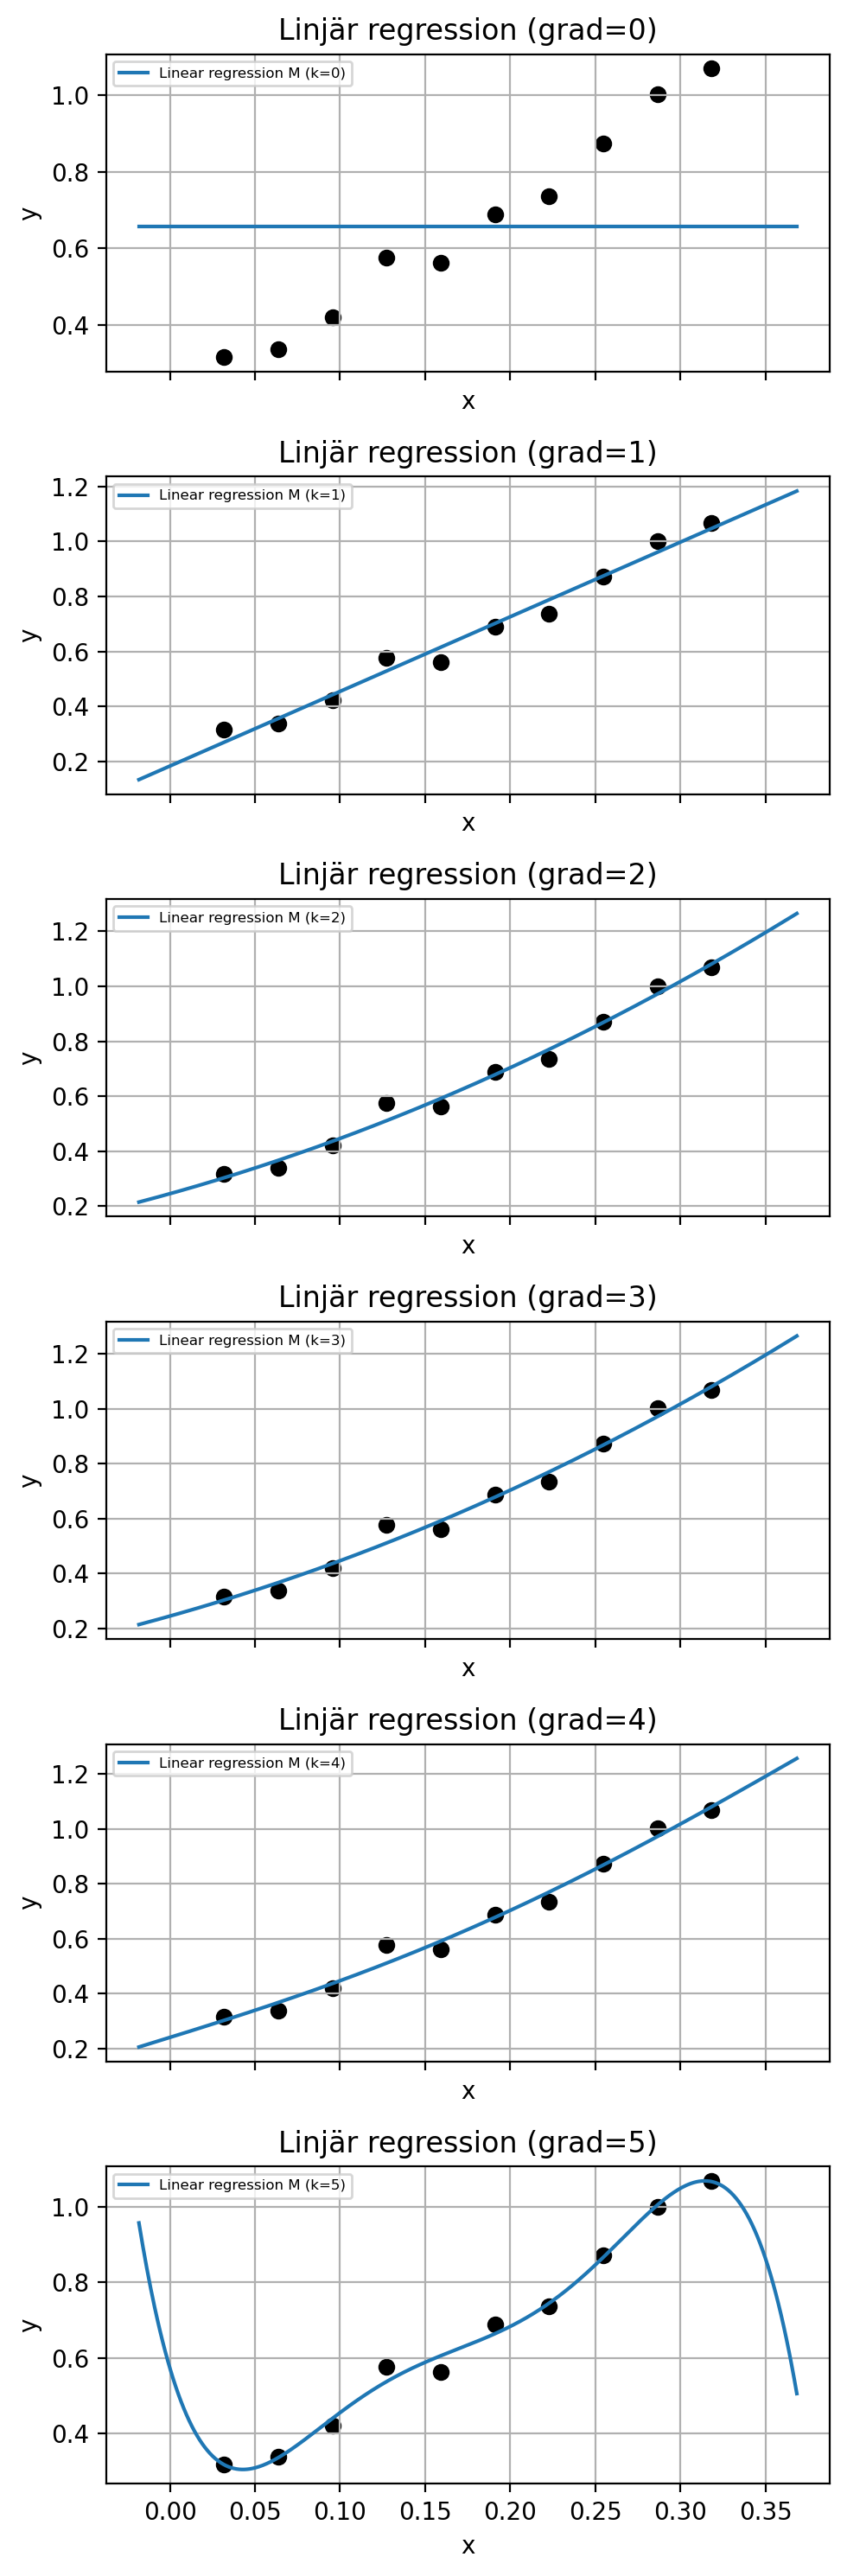

In [4]:
xdata = np.array([0.03183, 0.06366, 0.09549, 0.12732, 0.15915, 0.19099, 0.22282, 0.25465, 0.28648, 0.31831])
ydata = np.array([0.31694, 0.33844, 0.42142, 0.57709, 0.56218, 0.68851, 0.73625, 0.87270, 1.00150, 1.06840])

k = [0,1,2,3,4,5]

def design_matrix(xdata, polydeg):
    N_d = len(xdata)
    N_p = polydeg + 1
    X = np.zeros([N_d, N_p])
    for i, x_k in enumerate(xdata):
        for j in range(polydeg+1):
            X[i,j] = x_k**j
    return X

def polyfit(xdata, ydata, polydeg):

    X = design_matrix(xdata, polydeg)
    
    X_TX = np.matmul(X.T, X)
    ydata = np.array(ydata).reshape(-1,1)
    X_TY = np.matmul(X.T, ydata)
    X_TXinv = np.linalg.inv(X_TX)
    theta = np.matmul(X_TXinv, X_TY)
    return theta

OLR_mean = []
fig, ax = plt.subplots(len(k),1, figsize=(5, 15), dpi=200, sharex=True)
x = np.linspace(min(xdata)-0.05, max(xdata)+0.05, 500)
for i in k:
    theta = polyfit(xdata, ydata, i)
    print(theta)
    OLR_mean.append(theta)
    
    X = design_matrix(x, i)
    
    D = np.matmul(X, theta)
    
    ax[i].set_title(f"Linjär regression (grad={i})")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    
    ax[i].scatter(xdata, ydata, color="black")
    ax[i].plot(x, D, linestyle="-", label=f"Linear regression M (k={i})")
    ax[i].legend(loc="best", fontsize=6)
    ax[i].grid()
    plt.tight_layout()

(b) Figur 1:

   Jämför data, exakt funktion samt de olika linjära modeller som anpassades i deluppgift 1(a).
   - Vad händer med modellen som har sex paramterar?

För grad 0 är den väldigt väldigt underanpassad
grad 1 är också ganska underanpassad men bättre än grad 0
grad 5 är ganska överanpassad
resten är ganska bra

## Steg 2: Bayesiansk inferens

Studera gärna uppvärmningsexemplet från Bayesiansk linjär regression i kapitel 18 (uppgifterna 18.2, 18.3, och 18.4). 

Gör **förberedelseuppgift 1 på Yata** (vilken inkluderar **uppgift 18.1**.

- Antag en (oberoende) normal a priori fördelning i alla parameterriktningar med medelvärdet $\mu_\theta=0$ samt standardavvikelse $\sigma_\theta=5.0$.
- Vidare antar vi oberoende och identiskt normalfördelade experimentella fel med medelvärdet $\mu_\epsilon=0$ samt standardavvikelse $\sigma_\epsilon = 0.05$.

(a)  Tabell 1:

   Gör bayesiansk inferens enligt ovan antaganden för $k \in \{0, 1, 2, 3, 4, 5\}$. Redovisa medelvärden samt standardavvikelse för de marginaliserade parameterfördelningarna för samtliga sex inferensproblem. 
   - Jämför med koefficienterna för Taylorutvecklingen av den underliggande funktionen. 
   - Jämför med resultaten från linjär regression ovan och tolka skillnaden.

In [7]:
from tabulate import tabulate

res_var_sq = 0.05**2
res_mean = 0

prior_var_sq = 5.0**2
prior_mean = 0

k = [0,1,2,3,4,5]

xdata = np.array([0.03183, 0.06366, 0.09549, 0.12732, 0.15915, 0.19099, 0.22282, 0.25465, 0.28648, 0.31831])
ydata = np.array([0.31694, 0.33844, 0.42142, 0.57709, 0.56218, 0.68851, 0.73625, 0.87270, 1.00150, 1.06840])

def design_matrix(xdata, polydeg):
    N_d = len(xdata)
    N_p = polydeg + 1
    X = np.zeros([N_d, N_p])
    for i, x_k in enumerate(xdata):
        for j in range(polydeg+1):
            X[i,j] = x_k**j
    return X

def polyfit(xdata, ydata, polydeg):
    X = design_matrix(xdata, polydeg)
    
    X_TX = np.matmul(X.T, X)
    ydata = np.array(ydata).reshape(-1,1)
    X_TY = np.matmul(X.T, ydata)
    X_TXinv = np.linalg.inv(X_TX)
    theta = np.matmul(X_TXinv, X_TY)
    return theta

def bayes_linreg(xdata, ydata, polydeg, res_var_sq, prior_var_sq):
    X = design_matrix(xdata, polydeg)
    theta_star = polyfit(xdata, ydata, polydeg)
    
    likelihood_inv = (X.T @ X)/res_var_sq
    
    post_inv = likelihood_inv + np.eye(X.shape[1])/prior_var_sq
    
    theta_tilde = np.linalg.inv(post_inv) @ likelihood_inv @ theta_star
    
    posterior_cov_matrix = np.linalg.inv(post_inv) 
    posterior_std = np.array([])
    
    likelihood_cov_matrix = np.linalg.inv(likelihood_inv)
    likelihood_std = np.array([]) 
    
    for i in range(polydeg+1):
        posterior_std = np.vstack(np.append(posterior_std, np.sqrt(posterior_cov_matrix[i,i])))
        likelihood_std = np.vstack(np.append(likelihood_std, np.sqrt(likelihood_cov_matrix[i,i])))
    return theta_tilde, posterior_std, likelihood_std

def taylor(polydeg):
    output_array = np.array([])
    for i in range(polydeg + 1):
        output_array = np.vstack(np.append(output_array, theta_true[i]))
    return output_array

BLR_mean = []
OLR_mean = []
taylor_ = []
LH_std = []
BLR_std =[]
for i in k:
    theta_tilde, posterior_std, likelihood_std = bayes_linreg(xdata, ydata, i, res_var_sq, prior_var_sq)
    BLR_mean.append(theta_tilde)
    OLR_mean.append(polyfit(xdata, ydata, i))
    taylor_.append(taylor(i))
    BLR_std.append(posterior_std)
    LH_std.append(likelihood_std)    
tabell = {
    "Degree": k,
    "": [],
    "Taylor expansion": taylor_,
    "OLR mean": OLR_mean,
    "BLR mean": BLR_mean,
} 
print(tabulate(tabell, headers="keys", tablefmt="grid"))

+----------+----+--------------------+---------------------+----------------+
|   Degree |    | Taylor expansion   | OLR mean            | BLR mean       |
+==========+====+====================+=====================+================+
|        0 |    | [[0.25]]           | [[0.658343]]        | [[0.65833642]] |
+----------+----+--------------------+---------------------+----------------+
|        1 |    | [[0.25     ]       | [[0.18285983]       | [[0.1834194 ]  |
|          |    |  [1.5707963]]      |  [2.71596033]]      |  [2.71275354]] |
+----------+----+--------------------+---------------------+----------------+
|        2 |    | [[0.25     ]       | [[0.24577724]       | [[0.23857652]  |
|          |    |  [1.5707963]       |  [1.7276393 ]       |  [1.84448647]  |
|          |    |  [2.4674011]]      |  [2.8226453 ]]      |  [2.48277064]] |
+----------+----+--------------------+---------------------+----------------+
|        3 |    | [[0.25     ]       | [[0.24519042]       | [[0

(b) Figur 2:

   Fokusera på inferensen med ett tredjegradspolynom ($k=3$). Redovisa i fyra paneler de marginaliserade fördelningarna för det fyra parametrarna. I varje panel skall ni jämföra a priori- och a posteriori-fördelningarna samt även visa trolighetsfunktionen som en funktion av respektive parameter. 
   - Tolka dessa resultat.

[[ 0.0970367 ]
 [ 2.28500156]
 [14.80692099]
 [27.89426807]]


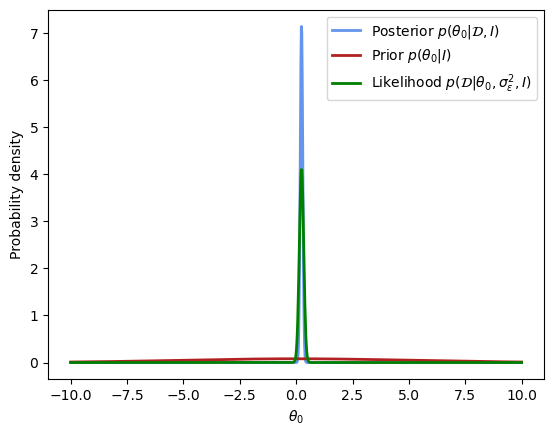

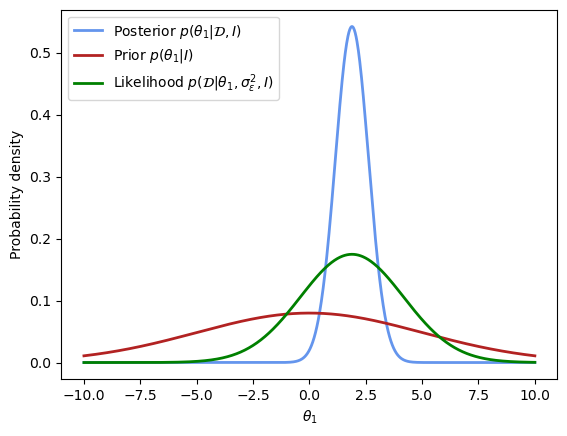

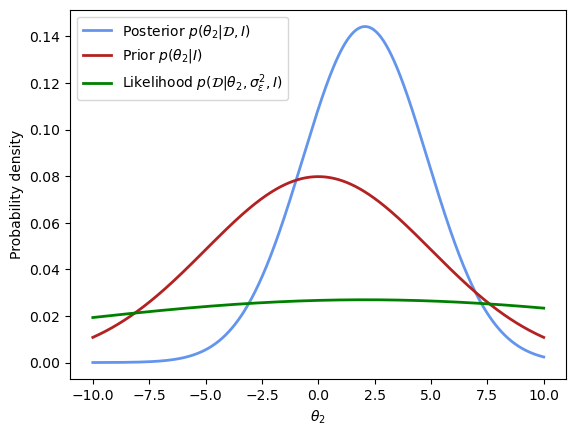

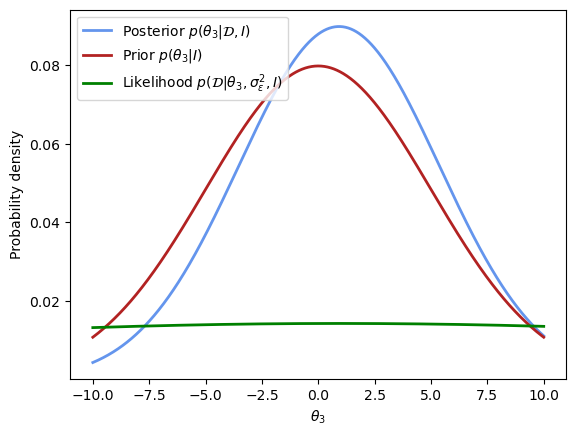

In [8]:
from scipy.stats import multivariate_normal

k = 3

mu = BLR_mean[k]
sigma = Sigma = BLR_std[k]

Sigma_likelihood = LH_std[k]
print(Sigma_likelihood)
mu_likelihood = BLR_mean[k]

for i in range(k+1):
    theta_i = np.linspace(-10, 10, 1000)
    
    posterior_i = multivariate_normal(mu[i], Sigma[i]**2)
    prior_i = multivariate_normal(prior_mean, prior_var_sq)
    likelihood_i = multivariate_normal(mu_likelihood[i], Sigma_likelihood[i]**2)
    plt.plot(theta_i, posterior_i.pdf(theta_i), c='cornflowerblue', lw=2, label=rf'Posterior $p(\theta_{i}' + r'|\mathcal{D},I)$')
    plt.plot(theta_i, prior_i.pdf(theta_i), c='firebrick', lw=2, label=rf'Prior $p(\theta_{i}|I)$')
    plt.plot(theta_i, likelihood_i.pdf(theta_i), c='green', lw=2, label=r'Likelihood $p(\mathcal{D}|'+rf'\theta_{i}, \sigma_\epsilon^2,I)$')
    
    plt.xlabel(rf'$\theta_{i}$')
    plt.legend(loc='best')
    plt.ylabel('Probability density')
    plt.show()

## Steg 3: MCMC sampling och a posteriori förutsägelser

Målet med detta sista steg är att genomföra den Bayesianska inferensen helt numeriskt. 

(a) Examineras i Yata

- Skapa en MCMC-sampler som bygger på Metropolisalgoritmen och som använder en normalfördelning för att föreslå nya positioner i ett $N_p$-dimensionellt rum.
- Definiera funktioner för logaritmen av a priori fördelningen samt för logaritmen av trolighetsfunktionen som tar en parameteruppsättning som argument. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera. 
- Definiera slutligen en funktion som beräknar logaritmen av (den onormaliserade) a posteriorifördelningen. 

(b) Figur 3:

Utför en MCMC sampling av a posteriorifördelningen för den kvadratiska modellen (med tre parametrar). Visa följande marginalfördelningar, gärna i en så kallad "corner plot":

Bivariata
-  $p(\theta_0,\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_0,\theta_2 \vert \mathcal{D}, I)$
-  $p(\theta_1,\theta_2 \vert \mathcal{D}, I)$

Univariata
-  $p(\theta_0 \vert \mathcal{D}, I)$
-  $p(\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_2 \vert \mathcal{D}, I)$

Undersök hur kvaliten på dessa samplade fördelningar beror på antalet iterationer samt på bredden på normalfördelningen som används för att föreslå nya positioner. Jämför på egend hand (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Hur väl jämför medelvärden och varianser med den analytiska lösningen?
- Kvaliteten på samplingen måste vara tillräckligt hög för att (åtminstone) de univariata normaldistributionerna skall kunna urskiljas.

(c) Figur 4:

Välj cirka 100 stickprov ur den samplade fördelningen och gör en förutsägelse av funktionens utseende i intervallet $x \in [0, 0.4]$. Jämför med data samt på den underliggande funktionen. Försök dra slutsatser kring följande (dessa undersökningar behöver ej redovisas i den inlämnade ipynb-filen men kan diskuteras på redovisningsseminariet):
- Var är osäkerheten i förutsägelserna som störst?
- Med målet att den ändliga mängden med stickprov bäst skall representera den riktiga fördelningen av a posteriori förutsägelser, är det bäst att välja stickprov som kommer efter varandra i samplingen eller är det bättre att sprida ut dem?